# Linear regresion 선형 회귀

## k-NN regression의 한계

In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
sample = [50]

In [9]:
sample_pred = knr.predict([sample])

sample_pred

array([1033.33333333])

### scatter plot

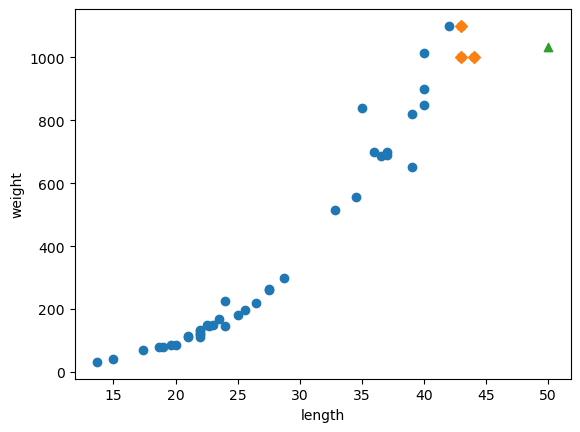

In [11]:
import matplotlib.pyplot as plt

distances, indices = knr.kneighbors([sample])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indices], train_target[indices], marker='D')

plt.scatter(sample, sample_pred, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- sample(`length = 50`)의 가까운 이웃 $\rightarrow$ length==45 내외

    - k-NN은 length==45 내외의 data들의 무게를 평균해서 예측한다.

In [12]:
np.mean(train_target[indices])

1033.3333333333333

- k-NN 회귀는 가까운 샘플들의 target을 평균해서 예측한다.

    - 새로운 sample(data)가 train set의 범위를 벗어나면 $\rightarrow$ 예측이 빗나갈 수 있다!

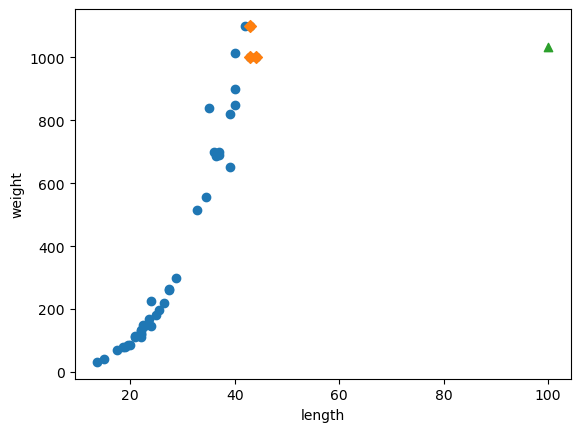

In [14]:
sample = [100]

distances, indices = knr.kneighbors([sample])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indices], train_target[indices], marker='D')

plt.scatter(sample, knr.predict([sample]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

- sample(`length = 100`)의 data도 가까운 이웃 data를 기반으로 예측

    - **k-NN regression model의 한계**: 새로운 sample data가 아무리 커도 예측 data는 기존 data를 벗어나지 못한다
    
- - -

- machine learning model은 한 번 만들고 끝나는 프로그램이 아니다.

    - 시간과 환경이 변화하면서 $\rightarrow$ 데이터도 바뀐다
    
        - 주기적으로 새로운 train data로 model을 다시 훈련(fit)해야 한다!